In [130]:
# Libraries
library(Seurat, quietly = TRUE)
library(ggplot2, quietly = TRUE)
library(SeuratHelper, quietly=TRUE)

In [152]:
# Variables
data_dir <- "../data/JSS2020_blood/"
in_file <- paste0(data_dir, "pbmc.rds")
plot_dir <- "../analysis/reference_jss-2020-blood/"
dir.create(plot_dir)
out_file <- paste0(data_dir, "ref_jss-2020-blood.Rds")

Warning message in dir.create(plot_dir):
“'../analysis/reference_jss-2020-blood' already exists”


In [4]:
# Read data
ds <- readRDS(in_file)

In [9]:
# Create plot theme
options(repr.plot.width=20, repr.plot.height=7)

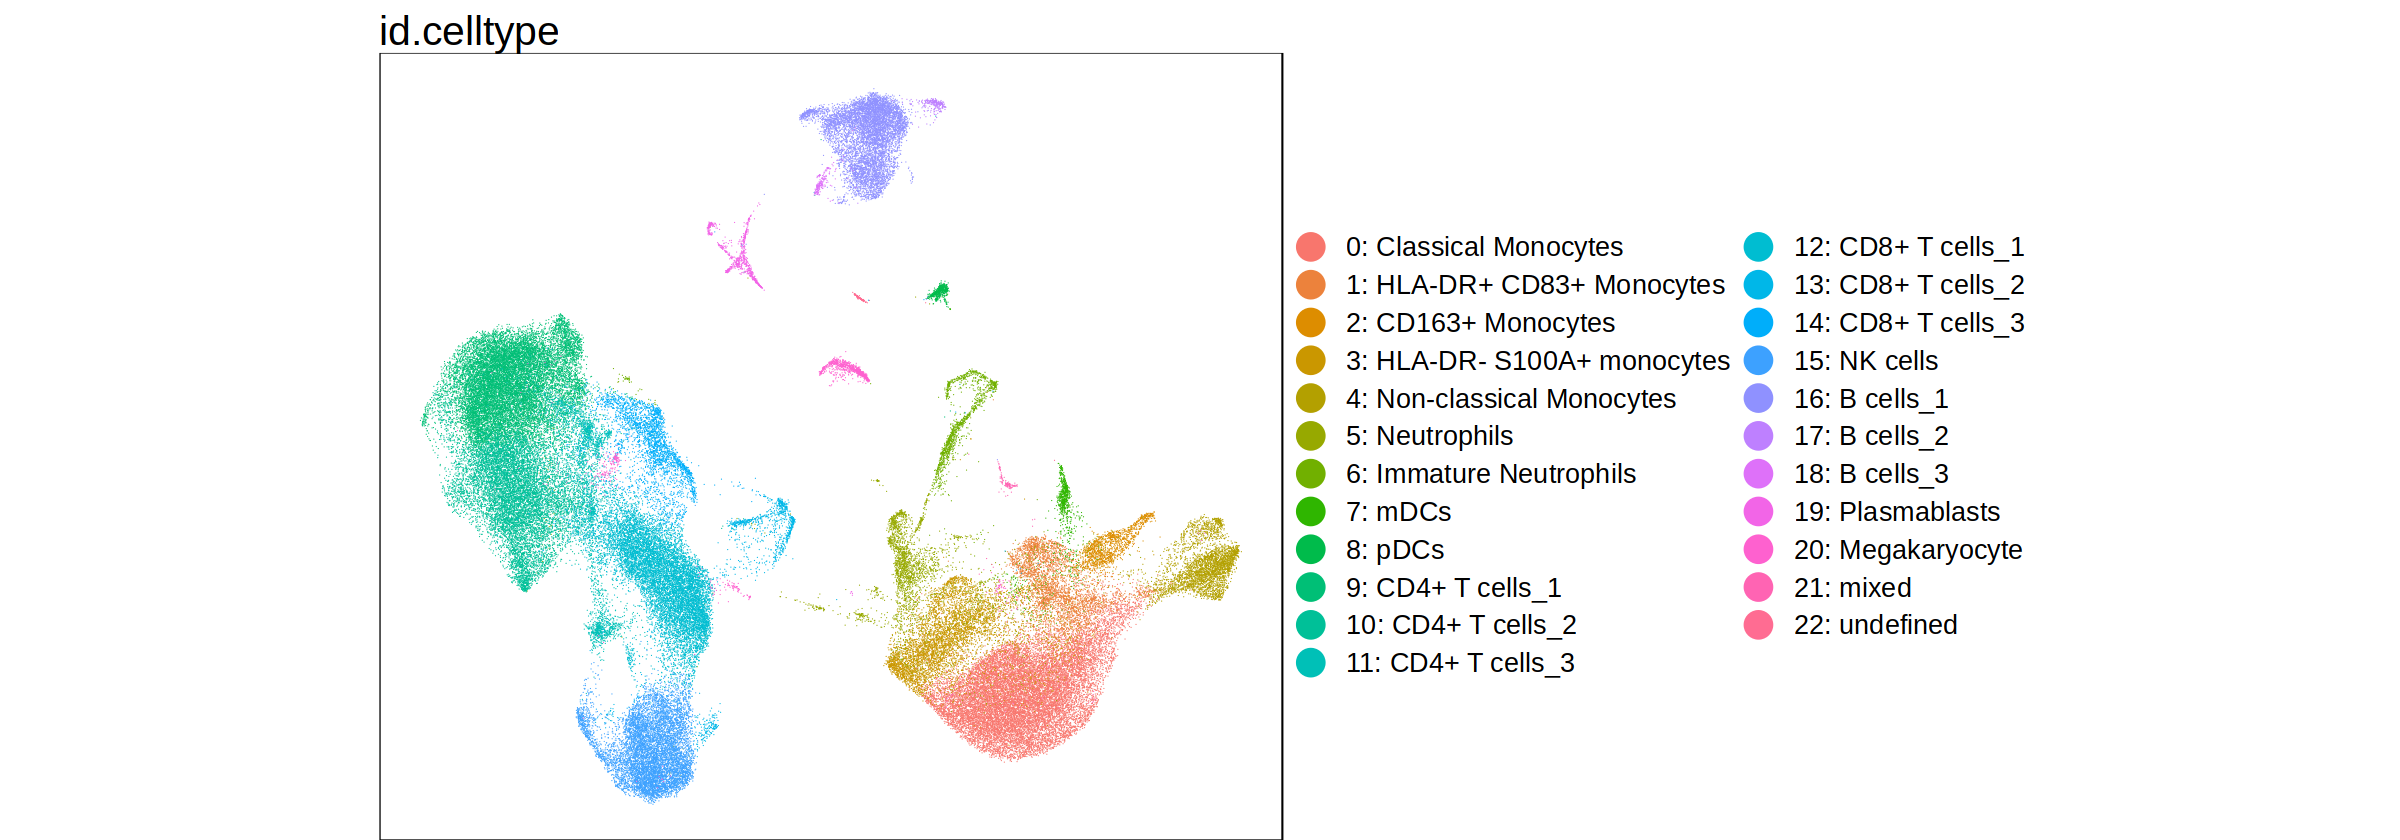

In [136]:
# Plot
plot_embedding(ds, "id.celltype", embedding="umap", shape=16, pt.stroke=.1, legend.rows = 2)

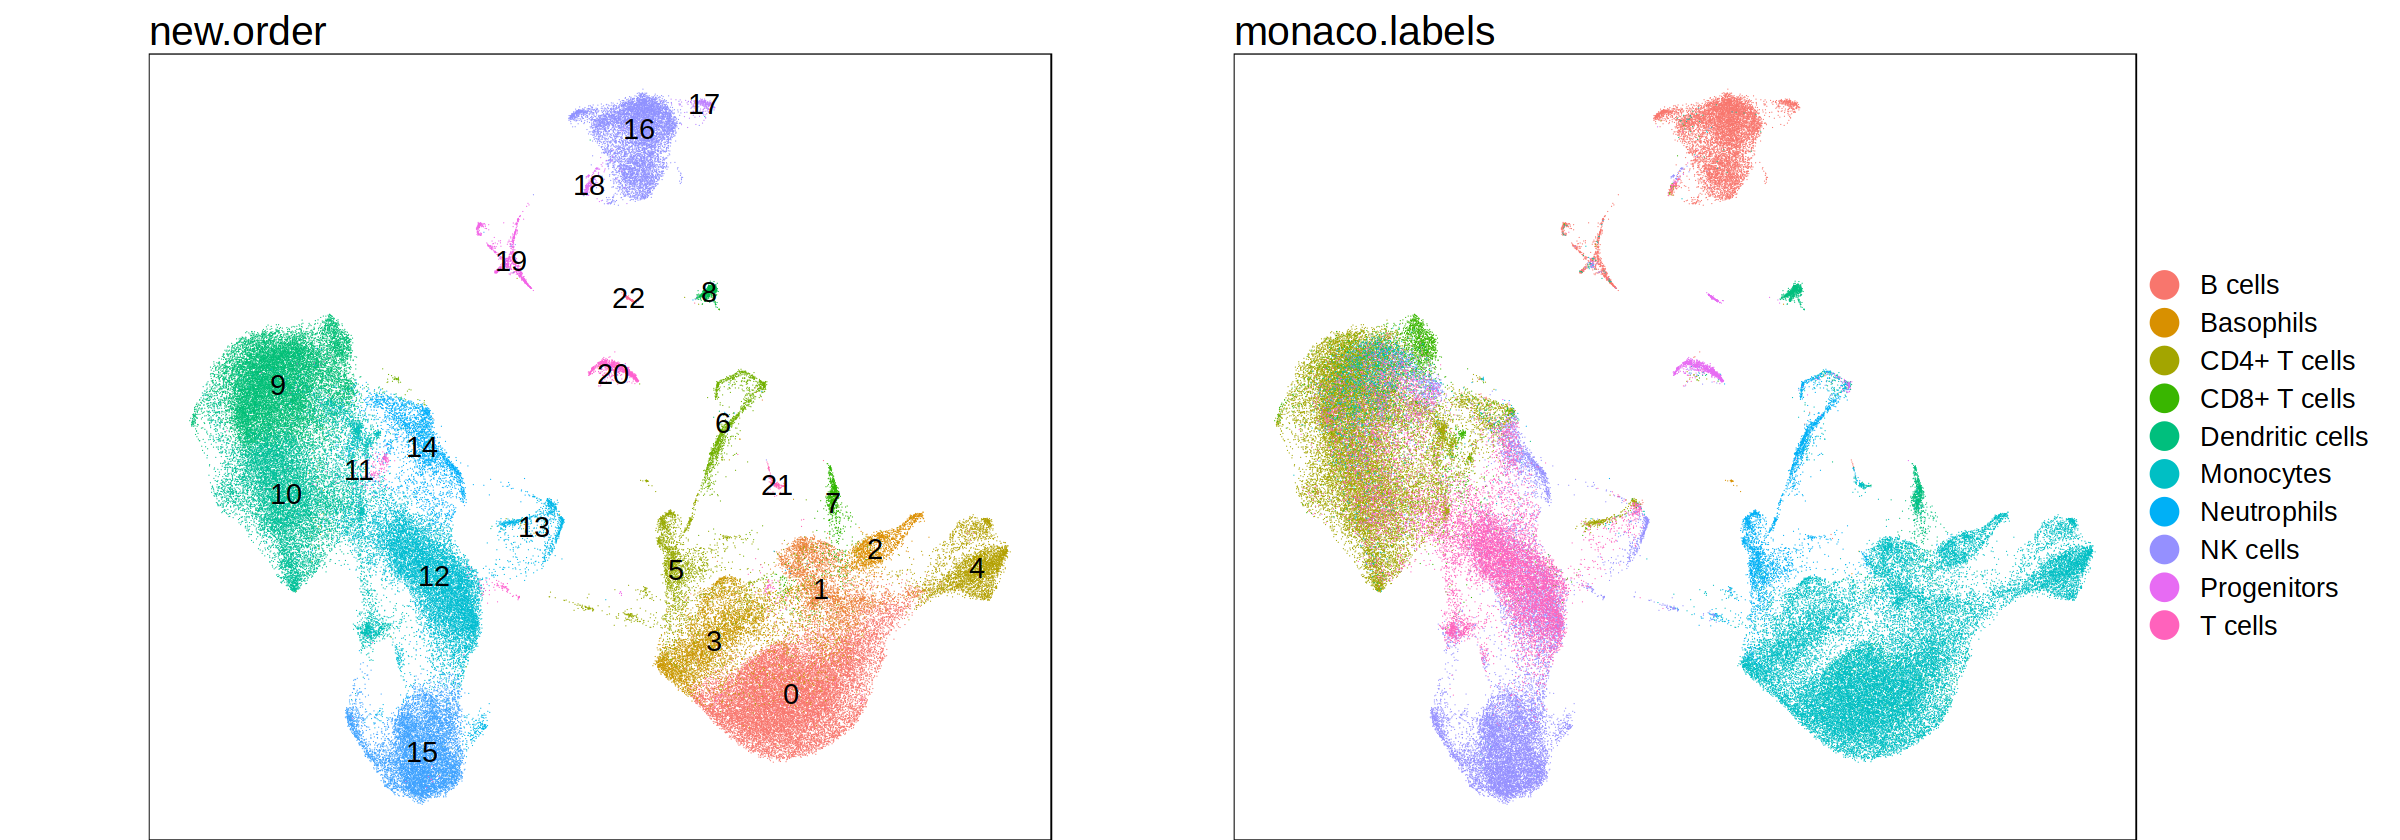

In [119]:
# Plot
p1 <- plot_embedding(ds, "new.order", embedding="umap", shape=16, pt.stroke=.1, label = "text")
p2 <- plot_embedding(ds, "monaco.labels", embedding="umap", shape=16, pt.stroke=.1)
cowplot::plot_grid(p1, p2)

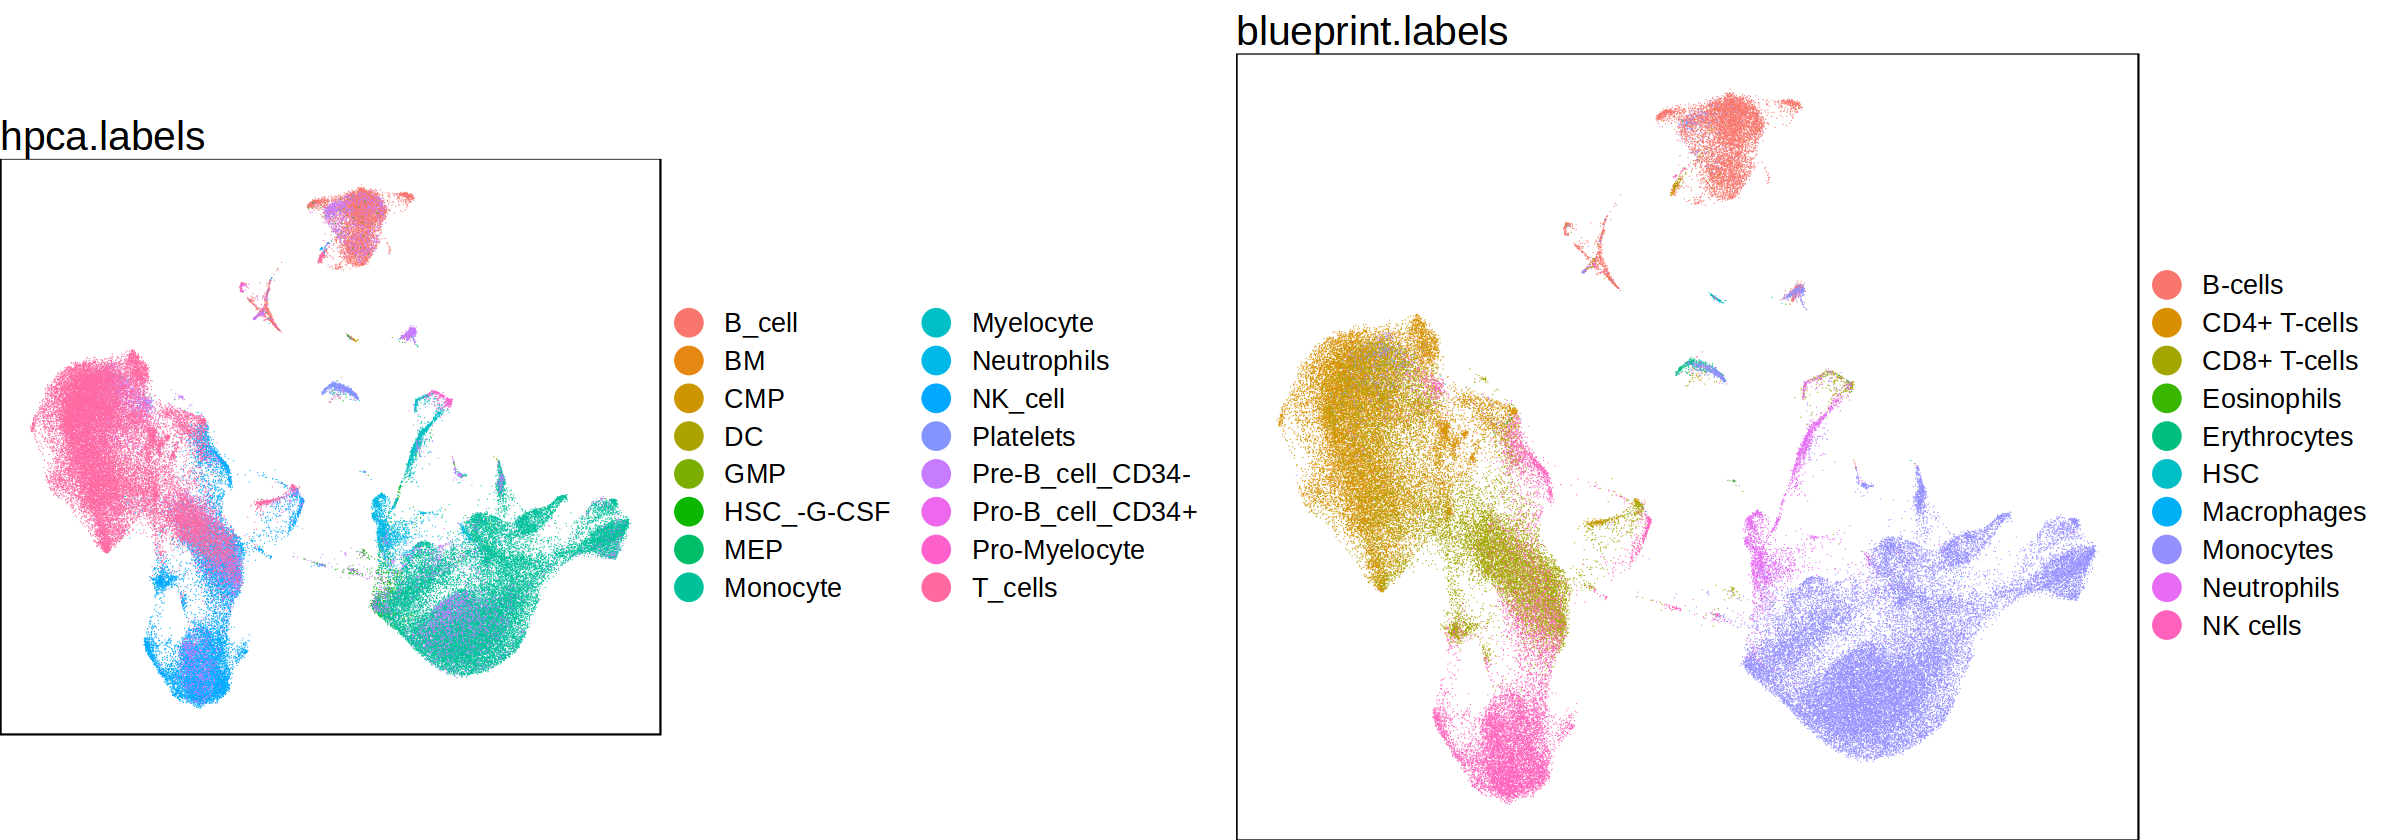

In [122]:
# Plot
p1 <- plot_embedding(ds, "hpca.labels", embedding="umap", shape=16, pt.stroke=.1)
p2 <- plot_embedding(ds, "blueprint.labels", embedding="umap", shape=16, pt.stroke=.1)
cowplot::plot_grid(p1, p2)

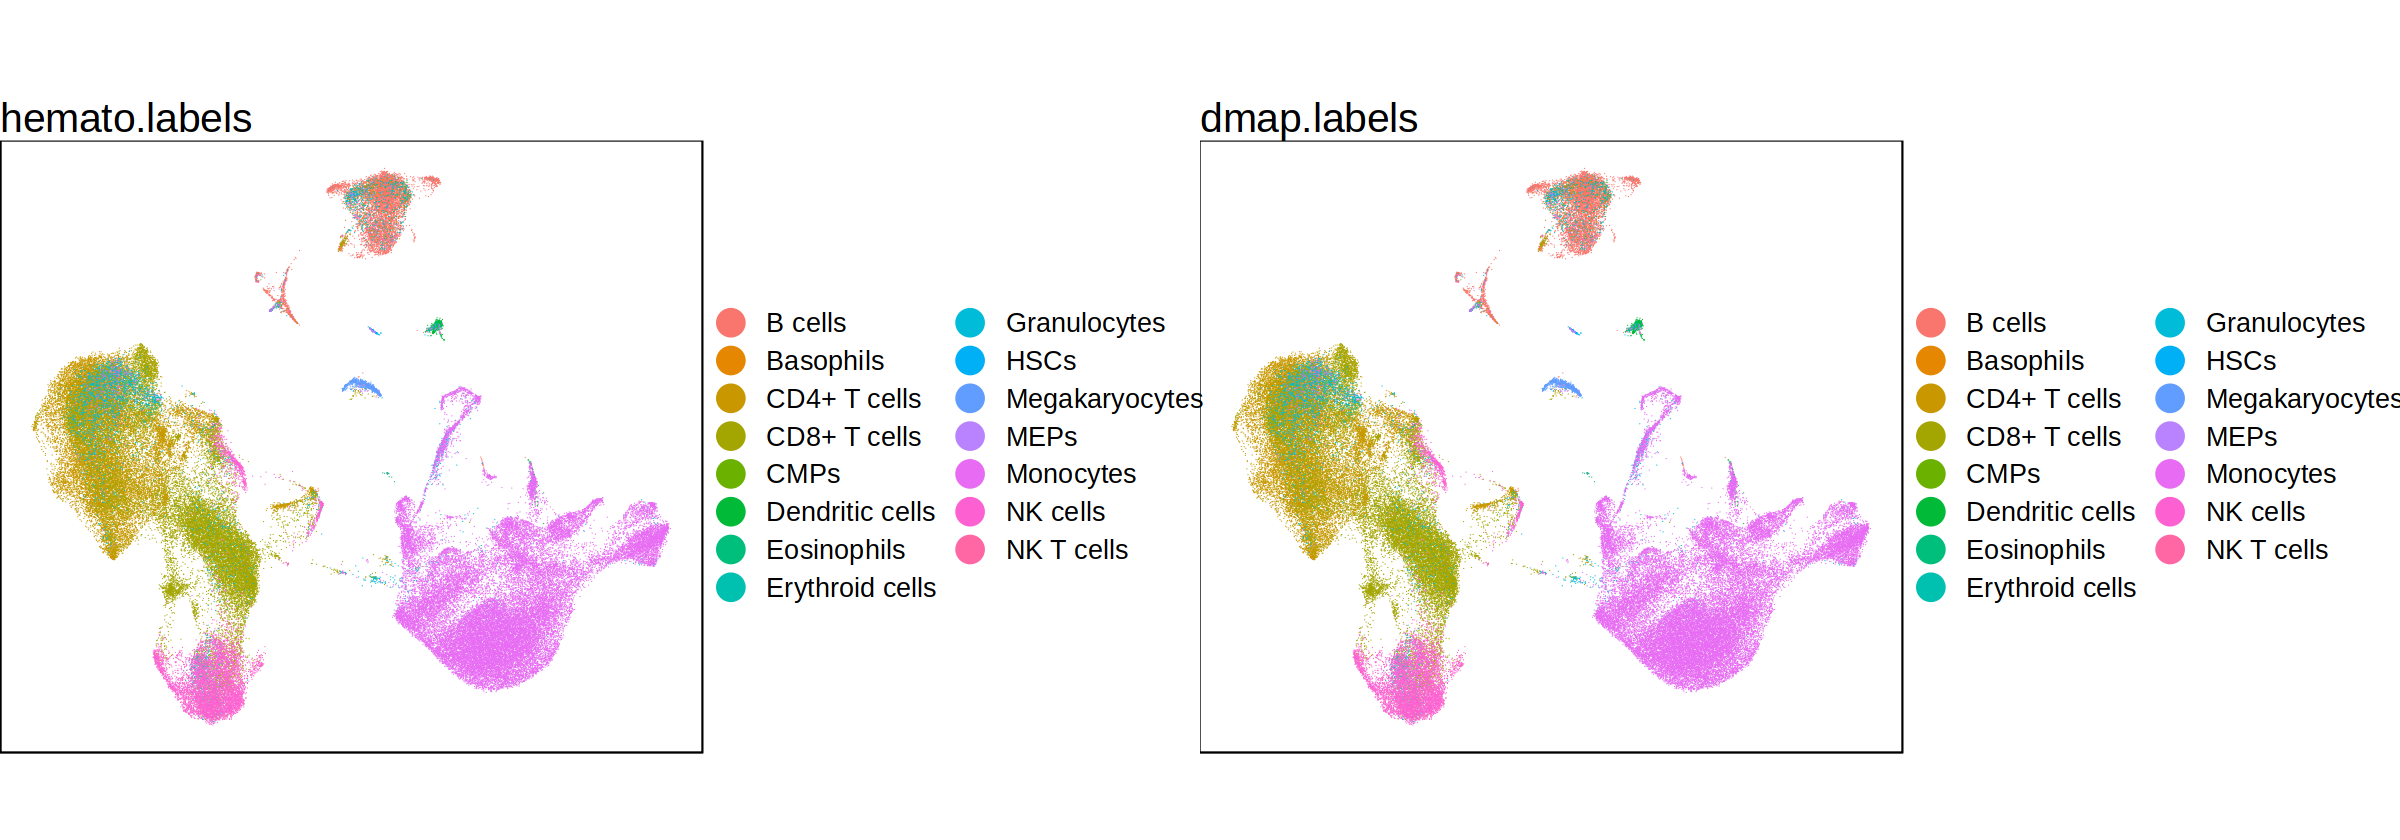

In [121]:
# Plot
p1 <- plot_embedding(ds, "hemato.labels", embedding="umap", shape=16, pt.stroke=.1)
p2 <- plot_embedding(ds, "dmap.labels", embedding="umap", shape=16, pt.stroke=.1)
cowplot::plot_grid(p1, p2)

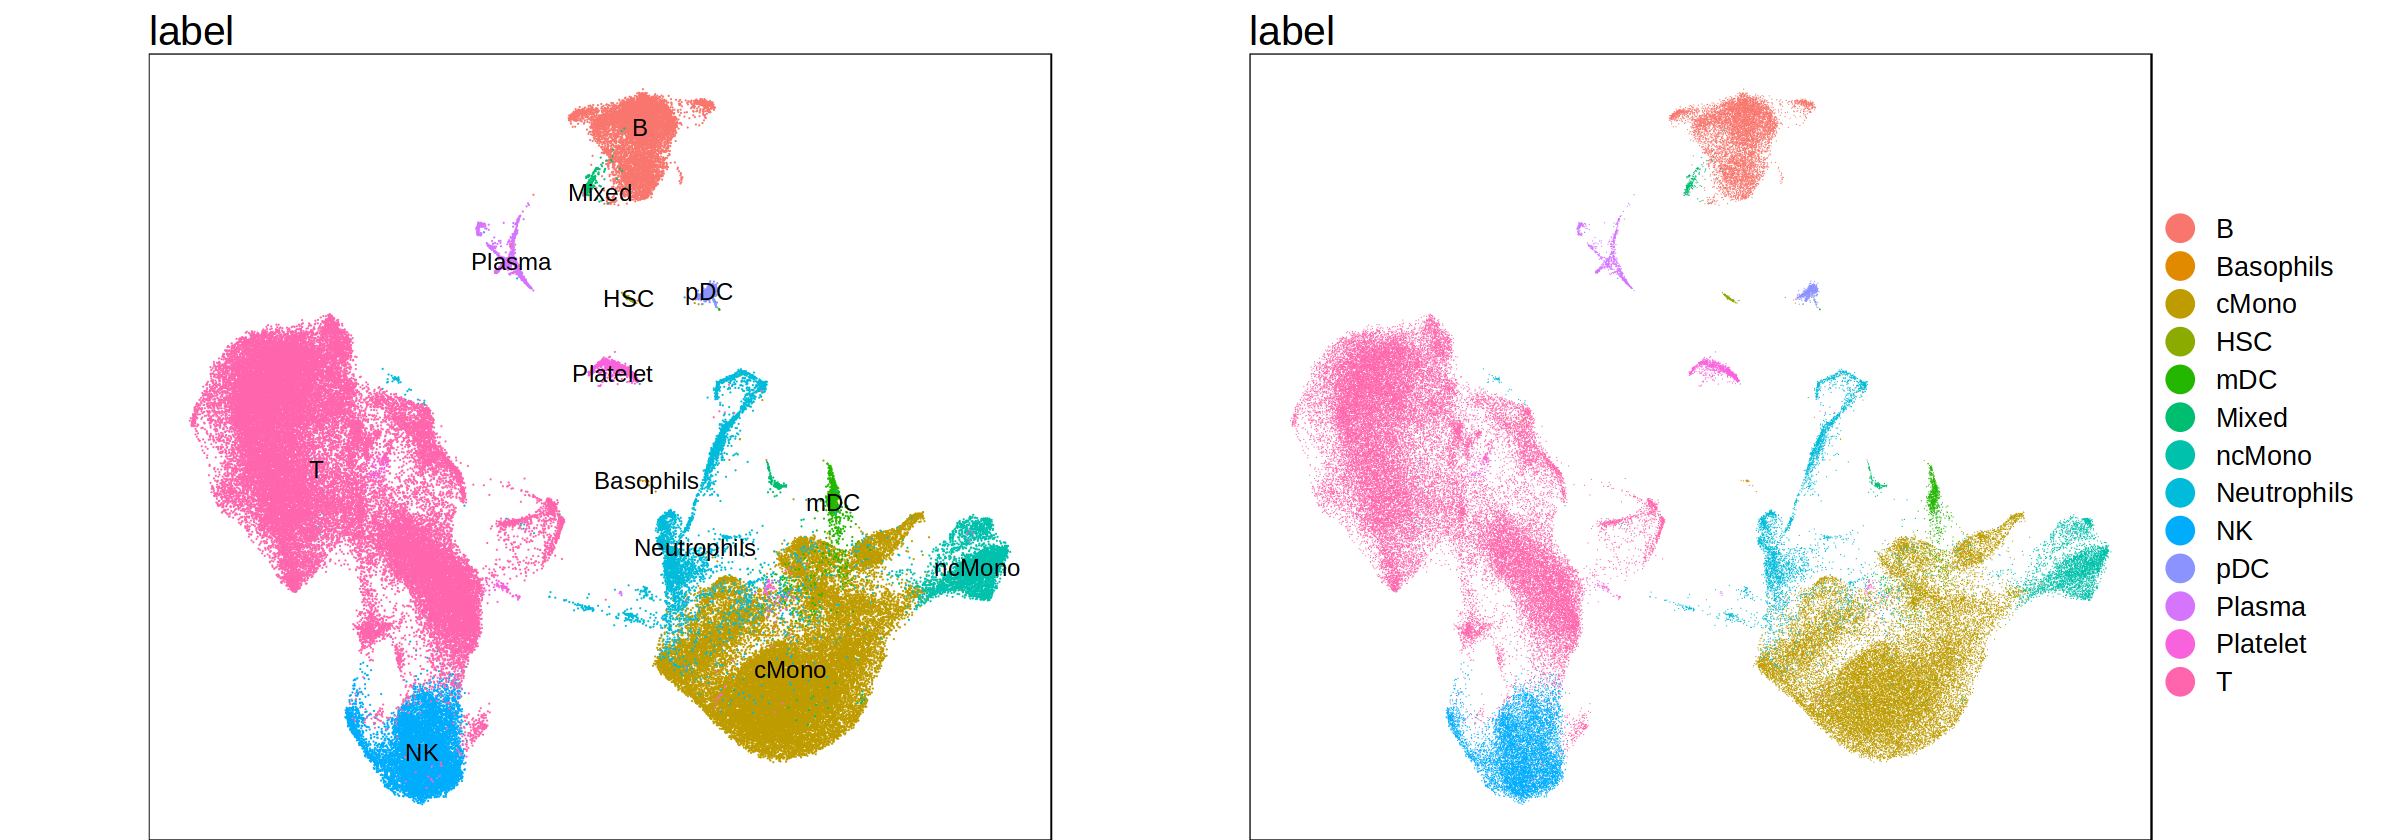

In [151]:
# Combine cell types to new annotation level
ds$label <- as.character(ds$new.order)
ds$label[ds$new.order %in% c(0:3)] <- "cMono"
ds$label[ds$new.order == 4] <- "ncMono"
ds$label[ds$new.order %in% c(5,6)] <- "Neutrophils"
ds$label[ds$new.order == 7] <- "mDC"
ds$label[ds$new.order == 8] <- "pDC"
ds$label[ds$new.order %in% c(9:14)] <- "T"
ds$label[ds$new.order == 15] <- "NK"
ds$label[ds$new.order %in% c(16:17)] <- "B"
ds$label[ds$new.order == 18] <- "Mixed"
ds$label[ds$new.order == 19] <- "Plasma"
ds$label[ds$new.order == 20] <- "Platelet"
ds$label[ds$new.order == 21] <- "Mixed"
ds$label[ds$new.order == 22] <- "HSC"
ds$label[ds$monaco.labels == "Basophils"] <- "Basophils"
p1 <- plot_embedding(ds, "label", embedding="umap", shape=16, pt.stroke = .5, label = "text", label.size = 5)
p2 <- plot_embedding(ds, "label", embedding="umap", shape=16, pt.stroke = .1, legend.rows = 1)
cowplot::plot_grid(p1, p2)

# Save plot
fn <- paste0(plot_dir, "umap_cell-type", ".", "png")
ggsave(fn, p1, height=6, width=6, bg="white")

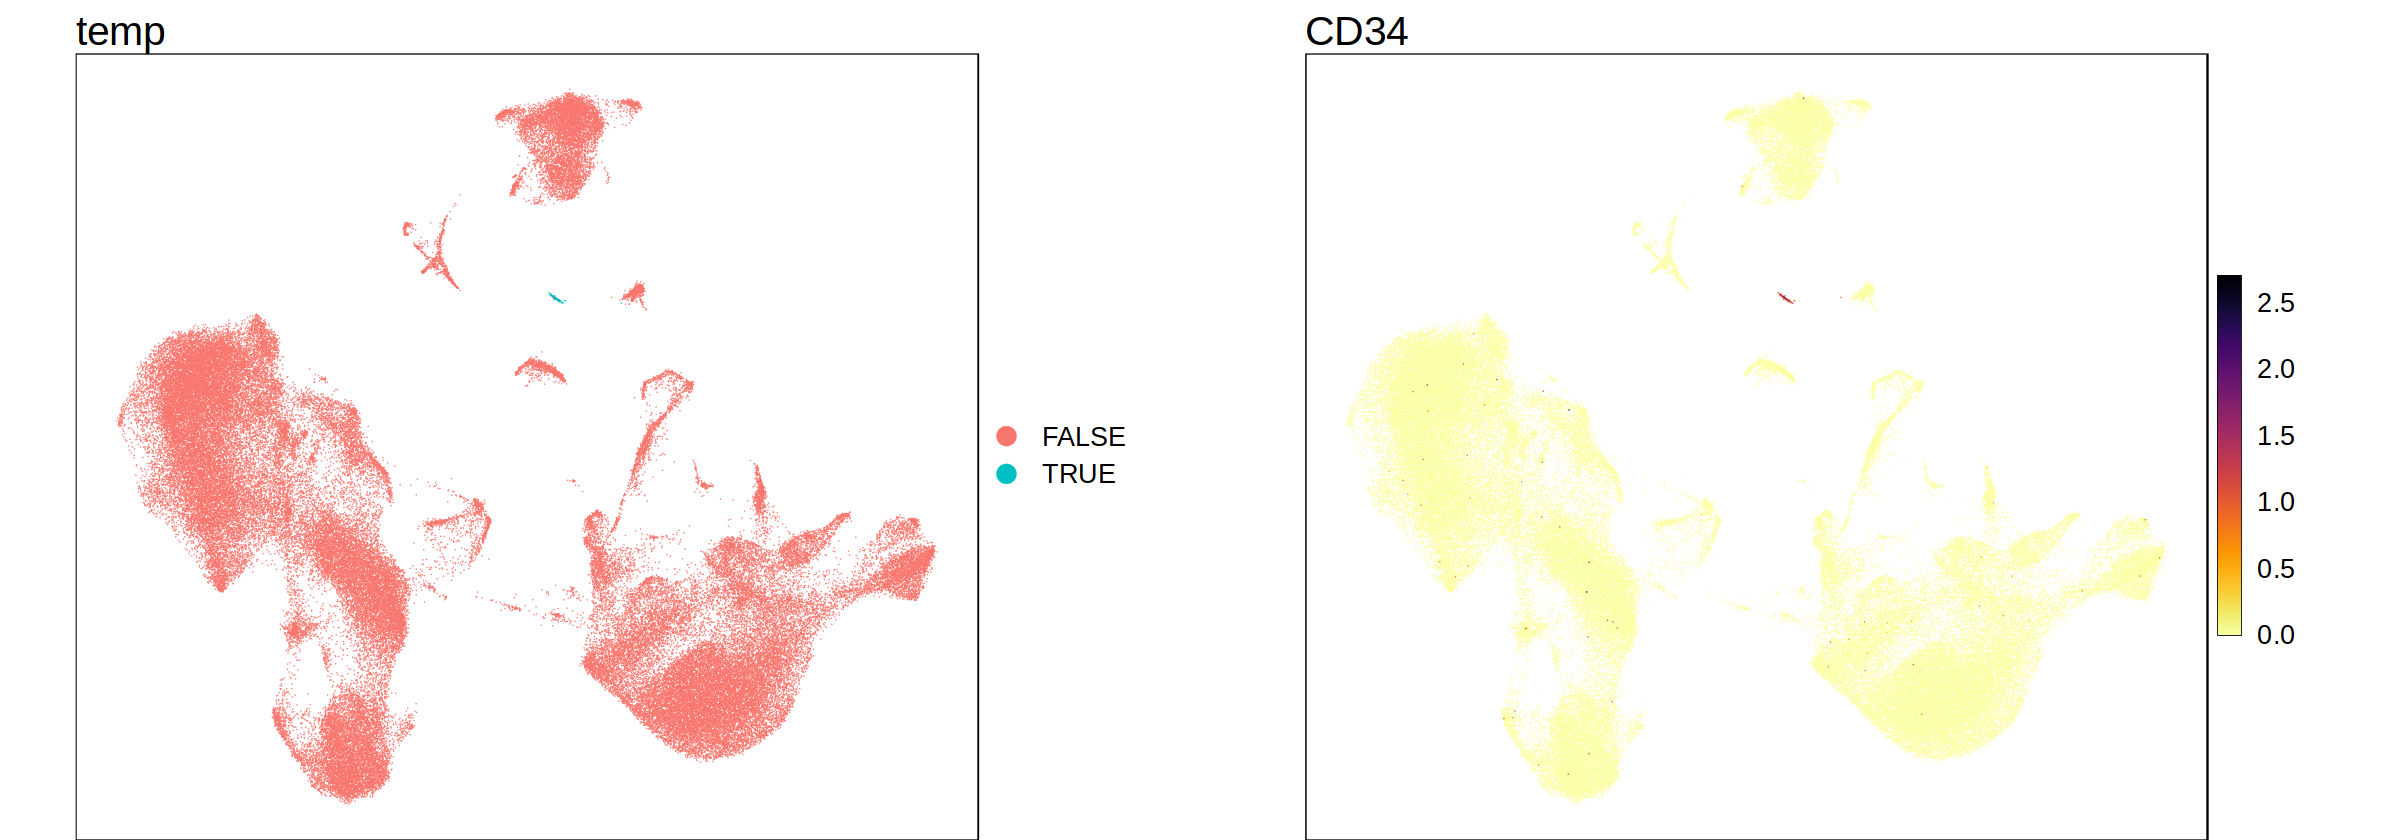

In [127]:
# Plot gene expression
ds$temp <- ds$hemato.labels == "HSCs"
p1 <- plot_embedding(ds, "temp", embedding="umap", pt.stroke=.1)
p2 <- plot_embedding(ds, "CD34", embedding="umap", pt.stroke=.1)
cowplot::plot_grid(p1, p2)

[1] "orig.ident"                                     
 [2] "nCount_RNA"                                     
 [3] "nFeature_RNA"                                   
 [4] "nReads_RNA"                                     
 [5] "nReads_ALL"                                     
 [6] "percent.mito"                                   
 [7] "percent.hb"                                     
 [8] "donor"                                          
 [9] "onset_of_symptoms"                              
[10] "days_after_onset"                               
[11] "sampleID"                                       
[12] "origID"                                         
[13] "date_of_sampling"                               
[14] "DaysAfterSample0"                               
[15] "experiment"                                     
[16] "PoolID"                                         
[17] "sampletag"                                      
[18] "hash.ID"                                        
[19] "platform"                                       
[20] "purification"                                   
[21] "cells"                                          
[22] "age"                                            
[23] "sex"                                            
[24] "group_per_sample"                               
[25] "who_per_sample"                                 
[26] "disease_stage"                                  
[27] "outcome"                                        
[28] "comorbidities"                                  
[29] "COVID.19.related_medication_and_anti.microbials"
[30] "RNA_snn_res.0.4"                                
[31] "cluster_labels_res.0.4"                         
[32] "new.order"                                      
[33] "id.celltype"                                    
[34] "hpca.labels"                                    
[35] "blueprint.labels"                               
[36] "monaco.labels"                                  
[37] "immune.labels"                                  
[38] "dmap.labels"                                    
[39] "hemato.labels"                                  
[40] "label"                                          
[41] "temp"                                           
[42] "libsize"                                        
[43] "ngenes"                                         
[44] "percent.mt"                                     
[45] "batch"

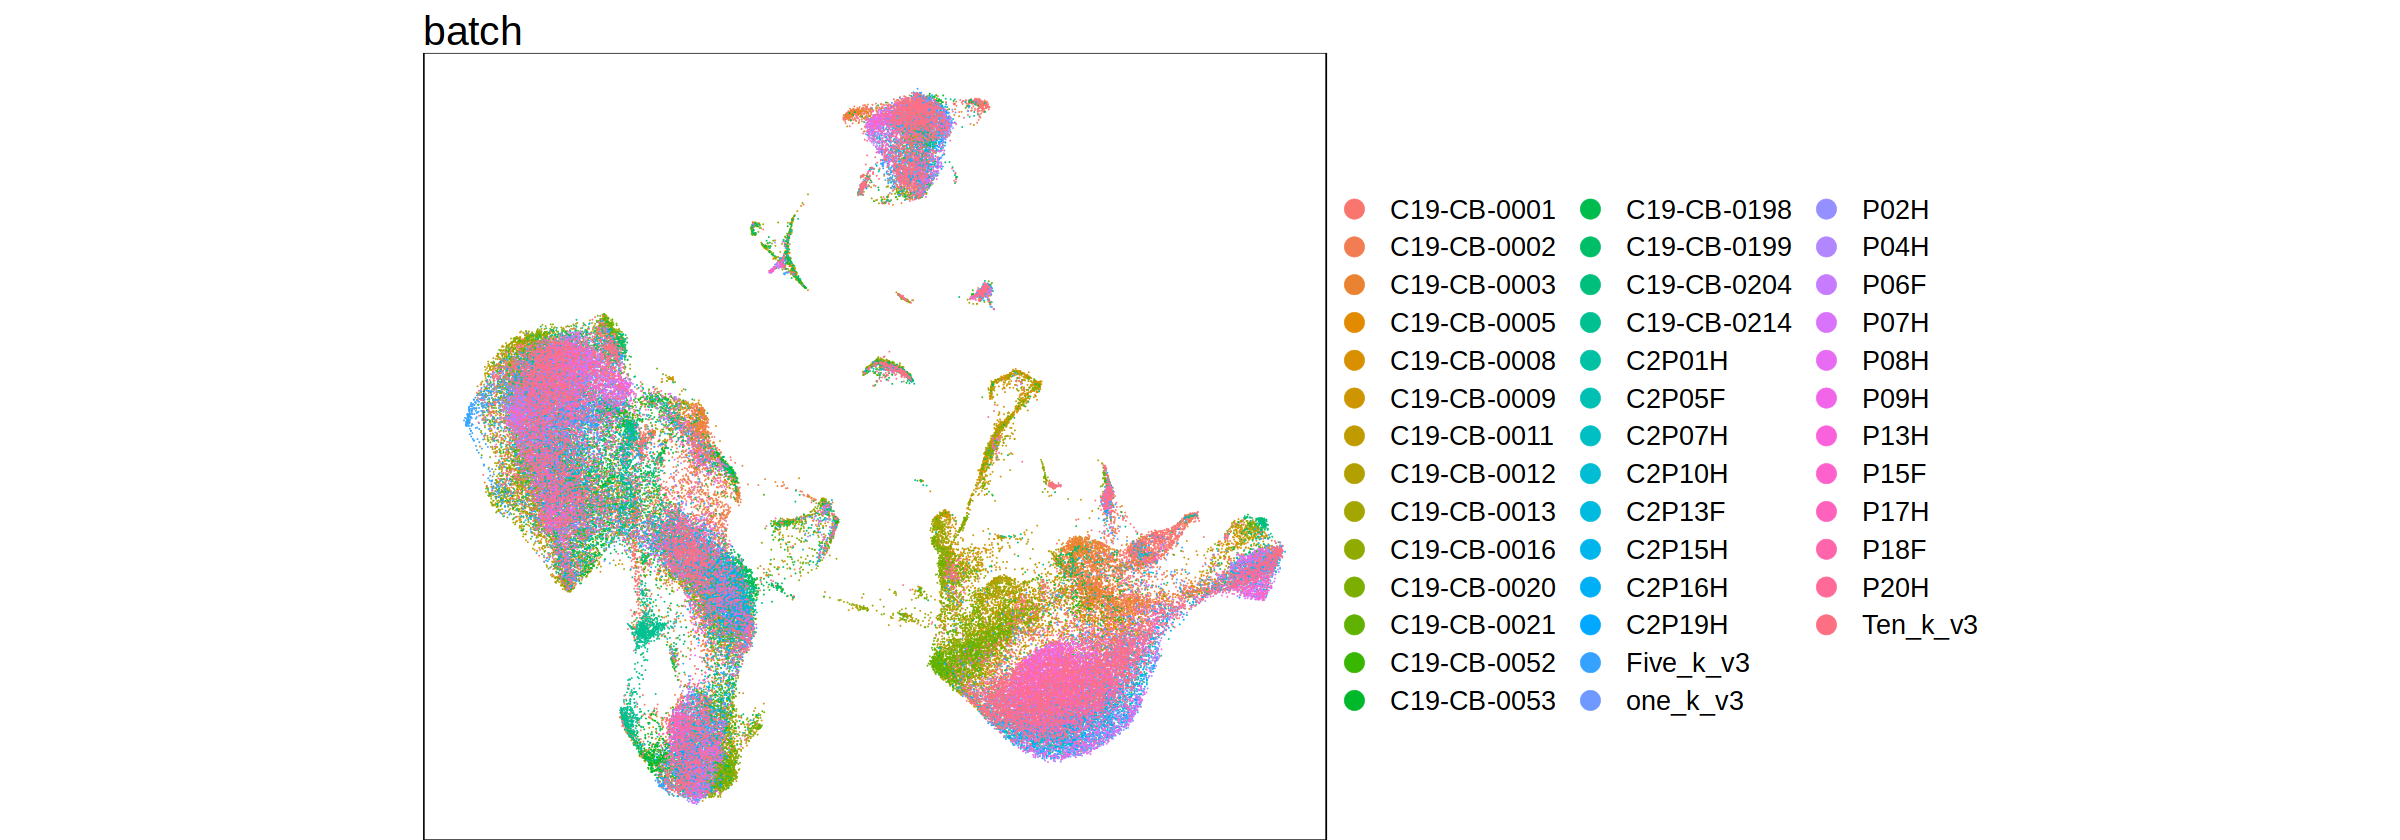

In [149]:
# Harmonize metadata
names(ds@meta.data)
ds$libsize <- ds$nCount_RNA
ds$ngenes <- ds$nFeature_RNA
ds$percent.mt <- ds$percent.mito
ds$batch <- ds$donor
plot_embedding(ds, "batch", embedding="umap", pt.stroke = .2, legend.rows = 3)

# Save plot
fn <- paste0(plot_dir, "umap_batch", ".", "png")
ggsave(fn, height=6, width=13, bg="white")

In [153]:
# Save data
saveRDS(ds, out_file)